In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import nltk

In [4]:
#Read the dataset
df = pd.read_csv('/content/drive/MyDrive/Machine_Learning/NLP - 1/Datasets _ Saved Models/Tweets.csv')
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df.shape

(14640, 15)

In [6]:
#Using the tweets to predict the sentiment
#Only using a subset of the data (5000 samples randomly picked)

indexes = list(range(df.shape[0]))
#Taking 5000 samples at random
l = np.random.choice(indexes,5000)

X = df.loc[l,'text']  #Tweets

Y = df.loc[l,'airline_sentiment'] #The Actual (Target) Sentiments

In [11]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
#Let's generate the BoW representation for the tweets
from nltk import word_tokenize

tokenized_tweets = []
for each in X.str.lower():
    tokenized_tweets.append(nltk.word_tokenize(each))

In [ ]:
tokenized_tweets[:2] #First two tokenized tweets

[['@',
  'americanair',
  '3231dtw',
  'to',
  'lag',
  'at',
  '4:45.',
  'flight',
  'cancelled',
  'flightled',
  'with',
  'no',
  'notice',
  '.',
  'given',
  'a',
  'voucher',
  'to',
  'a',
  'dirty',
  'hotel',
  ',',
  'with',
  'no',
  'food',
  'vouchers',
  'or',
  'apology',
  '.'],
 ['@',
  'usairways',
  'have',
  'scheduled',
  'flight',
  'sat',
  '(',
  '2morrow',
  ')',
  'cho-clt',
  'cho',
  'needs',
  'to',
  'be',
  'added',
  'to',
  'weather',
  'advisory',
  '.',
  'please',
  'evaluate',
  'asap',
  '.']]

In [12]:
#Next, we will remove the stopwords

#Let's fetch the English language stopwords
from nltk.corpus import stopwords
sw_list = stopwords.words('english')
print(sw_list)

sw_list.extend(['@',"'",'.','"','/','!',',',"'ve","...","n't",'$',"'s",'''"''',"''",'..','&','*',';','”','``',':','#','!','-','?','%',"'d","'m",'+','++'])
print(sw_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
tweets_after_removing_SW = []
for each in tokenized_tweets:
    #print(each)
    line = []
    for word in each:
        if word not in sw_list:
            line.append(word)
    tweets_after_removing_SW.append(line)

tweets_after_removing_SW[:2] #First 2 tweets after removal of Stopwords
#print(tweets_after_removing_SW)

[['southwestair',
  'flight',
  'cancelled',
  'flightled',
  'due',
  'weather',
  'next'],
 ['jetblue',
  'd.c.',
  'thinking',
  'summer',
  'new',
  'nantucket',
  'service',
  'broadway',
  'world',
  'http',
  '//t.co/ds22ceeenj']]

In [16]:
#Let's do stemming to reduce the number of features!
from nltk.stem import SnowballStemmer
s_stemmer = SnowballStemmer('english')

s_stemmed_list = [] #After Stemming

for each_list in tweets_after_removing_SW:
    line = []
    for word in each_list:
        line.append(s_stemmer.stem(word))
    s_stemmed_list.append(line)
s_stemmed_list[:2]

[['southwestair', 'flight', 'cancel', 'flightl', 'due', 'weather', 'next'],
 ['jetblu',
  'd.c.',
  'think',
  'summer',
  'new',
  'nantucket',
  'servic',
  'broadway',
  'world',
  'http',
  '//t.co/ds22ceeenj']]

# Using BoW representation

In [17]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
inp = pd.DataFrame(te.fit(s_stemmed_list).transform(s_stemmed_list).astype(int), columns = te.columns_)
inp.head()

,(,),+1,+1-703-464-0200,+more,--,-/,-6,-8,-_-,...,😭😭💔💔💔💔💔💔💔,😷😱,🙅,🙅🙅🙅,🙉,🙏🙏🙏,🙏🙏🙏✌️✌️✌️🙏🙏🙏,🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏😢😢😢😢😢😢😢😢🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏,🚫,🚶🚶🚶🚶
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
inp.shape

(5000, 6431)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inp, Y, test_size = 0.3, random_state = 2)

In [20]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [21]:
y_hat = model.predict(x_test) #Predictions
y_hat

array(['positive', 'negative', 'negative', ..., 'positive', 'negative',
       'negative'], dtype='<U8')

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat)

0.6293333333333333

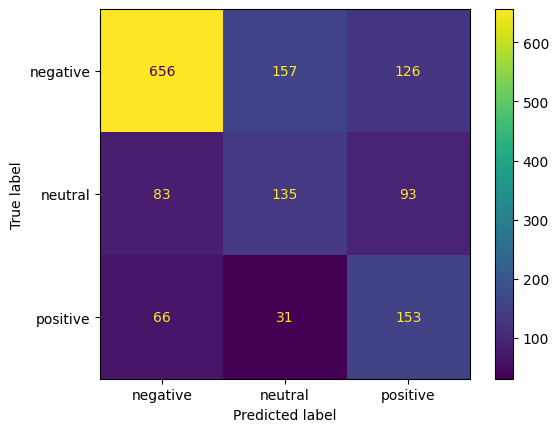

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from matplotlib import pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat), display_labels=list(np.unique(Y)))
disp.plot()
plt.show()

# Using Term Frequency Matrix

In [24]:
# Convert List of lists to list of Strings
# using map() + join()

str_data = list(map(' '.join, s_stemmed_list))

str_data[:5] # Displaying the top 5 stemmed strings

['southwestair flight cancel flightl due weather next',
 'jetblu d.c. think summer new nantucket servic broadway world http //t.co/ds22ceeenj',
 'americanair need chang ticket res ca chang onlin also ca get call due high volum -- u help',
 'usairway 3 delay 2 cancel flightlat doubl layov 72 hour late flightr .... could least get extra dividend mile',
 'jetblu tray tabl broken']

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(str_data)
str_df = pd.DataFrame(cv.transform(str_data).todense(), columns = sorted(cv.vocabulary_))
str_df.head()

,00,000,000419,000ft,00a,00am,00pm,0162389030167,0167560070877,02,...,zambia,zero,zl4bvexmcj,zone,zqutus7epw,zsdgzydnd,ztrdwv0n4l,zurich,zv2pt6trk9,zvfmxnuelj
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
x_train, x_test, y_train, y_test = train_test_split(str_df, Y, test_size = 0.3, random_state = 2)

model = GaussianNB()
model.fit(x_train, y_train)

y_hat = model.predict(x_test) #Predictions
accuracy_score(y_test, y_hat)

0.614

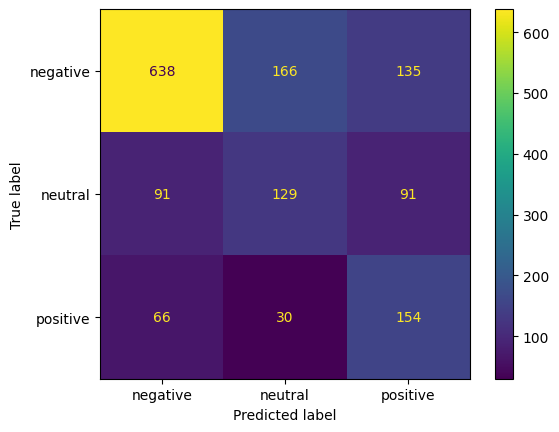

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat), display_labels=list(np.unique(Y)))
disp.plot()
plt.show()

# Using TF-IDF

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
fidf = TfidfVectorizer()
fidf.fit(str_data)
tfidf_df = pd.DataFrame(fidf.transform(str_data).todense(), columns = sorted(fidf.vocabulary_))
tfidf_df.head()

,00,000,000419,000ft,00a,00am,00pm,0162389030167,0167560070877,02,...,zambia,zero,zl4bvexmcj,zone,zqutus7epw,zsdgzydnd,ztrdwv0n4l,zurich,zv2pt6trk9,zvfmxnuelj
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
x_train, x_test, y_train, y_test = train_test_split(tfidf_df, Y, test_size = 0.3, random_state = 2)

model = GaussianNB()
model.fit(x_train, y_train)

y_hat = model.predict(x_test) #Predictions
accuracy_score(y_test, y_hat)

0.6126666666666667

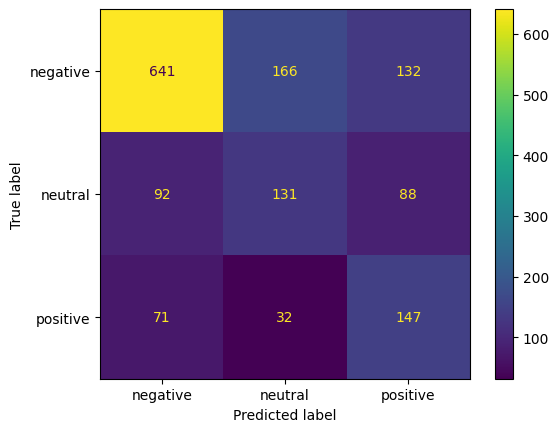

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat), display_labels=list(np.unique(Y)))
disp.plot()
plt.show()

> To improve these results, you can think of reducing the dimensions of the input data by using appropriate dimensionality reduction techniques (feature selection & feature extraction).

> You can explore Ensemble-based classification models for better baseline results.

> Explore pre-trained models that have been built specifically for sentiment classification.

> Use sentence level embeddings from pretrained models for this supervised task.  

In [35]:
!pip install pycaret

In [36]:
# We recommend using PyCaret for testing multiple classifiers simultaneously.
import pandas as pd
from pycaret.classification import *

In [37]:
tfidf_df.shape

(5000, 5918)

In [38]:
#tfidf_df.drop('target', axis= 1, inplace = True)
tfidf_df['Y'] = Y.values.reshape(-1,1)

# The setup() function must also be called before executing any other function,
# its two mandatory parameters being “data” and “target”, which will be our main column for operation.

#setting the experiment
experiment = setup(tfidf_df.loc[:500,:], target='Y')
# Choosing a small dataset to demonstrate the usage of PyCaret.
# You can run this on Colab to get the results on the complete dataset.

#show the best model and their statistics
best_model = compare_models()

,Description,Value
0,Session id,2306
1,Target,Y
2,Target type,Multiclass
3,Target mapping,"negative: 0, neutral: 1, positive: 2"
4,Original data shape,"(501, 5919)"
5,Transformed data shape,"(501, 5919)"
6,Transformed train set shape,"(350, 5919)"
7,Transformed test set shape,"(151, 5919)"
8,Numeric features,5918
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7400,0.8103,0.7400,0.7627,0.6897,0.3814,0.4566,1.1840
ridge,Ridge Classifier,0.7257,0.0000,0.7257,0.7539,0.6607,0.3232,0.4147,0.7340
svm,SVM - Linear Kernel,0.7200,0.0000,0.7200,0.7324,0.6753,0.3644,0.4127,0.4480
rf,Random Forest Classifier,0.7200,0.8065,0.7200,0.7676,0.6576,0.3124,0.4113,1.4840
xgboost,Extreme Gradient Boosting,0.7171,0.7861,0.7171,0.7036,0.6841,0.3830,0.4134,6.8720
gbc,Gradient Boosting Classifier,0.7057,0.7623,0.7057,0.7138,0.6694,0.3503,0.3846,4.4120
knn,K Neighbors Classifier,0.6943,0.7578,0.6943,0.6818,0.6755,0.3720,0.3848,0.5450
lr,Logistic Regression,0.6829,0.8358,0.6829,0.6285,0.5826,0.1697,0.2973,1.8050
dt,Decision Tree Classifier,0.6829,0.6800,0.6829,0.6851,0.6682,0.3714,0.3829,0.4900
ada,Ada Boost Classifier,0.6829,0.6490,0.6829,0.6325,0.6346,0.2981,0.3392,0.8570


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

### More details abot the usage of PyCaret can be found here:
https://analyticsindiamag.com/building-an-ml-classification-model-using-pycaret/

> LazyPredict package is another alternative that you can try for comparing the performance of multiple models simultaneously.

# Using Sentence Embeddings
## Training Doc2Vec

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# The input should be passed in sentences (list of strings)
sentences = str_data[:3000] # Using the first 3000 samples to train the model

# Tag the sentences for training
tagged_data = [TaggedDocument(words=sentence.split(), tags=[str(i)]) for i, sentence in enumerate(sentences)]

# Train the model
model = Doc2Vec(tagged_data, vector_size=5, window=2, min_count=3, workers=4, epochs = 500)

In [41]:
# Get the embeddings for the sentences
sentences = str_data
sentence_vectors = [model.infer_vector(sentence.split()) for sentence in sentences]

# The infer_vectors expects the input as a list of words (nltk.word_tokenize())

print("Sentence Embeddings:")
print(np.array(sentence_vectors).shape) #Embeddings of the sentences

Sentence Embeddings:
(5000, 5)


In [42]:
x_train = np.array(sentence_vectors)[:3000,:]
y_train = Y[:3000]

x_test =  np.array(sentence_vectors)[3000:,:]
y_test =  Y[3000:]

model = GaussianNB()
model.fit(x_train, y_train)

y_hat = model.predict(x_test) #Predictions
accuracy_score(y_test, y_hat)

0.65

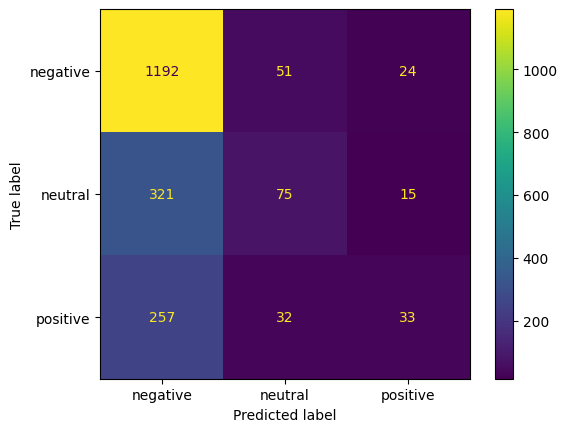

In [43]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat), display_labels=list(np.unique(Y)))
disp.plot()
plt.show()

# Using Pre-trained BERT for Sentiment Classification
Load the corresponding model as per the task chosen, and here we load distilled BERT base model for sentiment classification

In [44]:
from transformers import pipeline
model_trained = "distilbert-base-uncased-finetuned-sst-2-english"
distil_bert_model = pipeline(task="sentiment-analysis", model=model_trained)

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [45]:
#Predictions
distil_bert_model(list(df.loc[11:15,'text'])) #Predicts one of two sentiments only: positive or negative

[{'label': 'POSITIVE', 'score': 0.9993509650230408},
 {'label': 'POSITIVE', 'score': 0.9940821528434753},
 {'label': 'POSITIVE', 'score': 0.9863133430480957},
 {'label': 'POSITIVE', 'score': 0.9996304512023926},
 {'label': 'NEGATIVE', 'score': 0.9980512857437134}]

In [46]:
for each in df.loc[11:15,'text']:
    print(each)

@VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D
@VirginAmerica This is such a great deal! Already thinking about my 2nd trip to @Australia &amp; I haven't even gone on my 1st trip yet! ;p
@VirginAmerica @virginmedia I'm flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlXHhKiyn
@VirginAmerica Thanks!
@VirginAmerica SFO-PDX schedule is still MIA.


In [47]:
df.loc[11:15,'airline_sentiment']

11    positive
12    positive
13    positive
14    positive
15    negative
Name: airline_sentiment, dtype: object

# Using Pre-Trained Sentence-BERT Embeddings

---


SentenceTransformers is a Python framework for state-of-the-art sentence, text and image embeddings. The initial work is described in the paper Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks.

You can use this framework to compute sentence / text embeddings for more than 100 languages. These embeddings can then be compared e.g. with cosine-similarity to find sentences with a similar meaning. This can be useful for semantic textual similar, semantic search, or paraphrase mining.

The framework is based on PyTorch and Transformers and offers a large collection of pre-trained models tuned for various tasks. You can also fine-tune your own models.

Refer for more details here: https://www.sbert.net/

In [48]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.3 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=d96e716ef7c213c8f910499c1eb5e9c37f8b1f2d354dc59baf6703bc1d858340
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [49]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

indexes = list(range(df.shape[0]))
# Choosing 5000 indexes at random
l = np.random.choice(indexes,5000)

#Our sentences we like to encode
sentences = list(df.loc[l,'text'].values) #Randomly choosing 5000 sentences

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

#Print the embeddings
#for sentence, embedding in zip(sentences, embeddings):
    #print("Sentence:", sentence)
    #print("Embedding:", embedding)
    #print("")

np.array(embeddings).shape

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

Streaming output truncated to the last 5000 lines.

Sentence: @USAirways I think it's ok.
Embedding: [-3.08374651e-02 -4.38664518e-02 -5.67455105e-02 -7.31688458e-03
  2.88471188e-02 -3.27319987e-02  6.86493590e-02 -3.70813869e-02
  1.12148495e-02 -9.38230194e-03 -5.40184230e-02  1.25419900e-01
 -1.47695364e-02  2.36234181e-02 -2.39474978e-02  1.08507924e-01
  1.14502516e-02 -3.82005908e-02 -4.52570990e-02  5.18132076e-02
  4.91662743e-03 -1.40218122e-03  2.08289120e-02  6.70215720e-03
 -2.40595490e-02 -1.10612936e-01 -3.92265022e-02  2.63268873e-02
 -8.56038108e-02 -5.94011061e-02 -2.40426622e-02  1.70004312e-02
  4.33058143e-02 -1.86788663e-02  2.39178296e-02  3.24254707e-02
  1.36845019e-02 -1.47156492e-02 -5.94971888e-02 -2.27657687e-02
 -2.36818399e-02 -7.71342963e-02  3.10370922e-02  5.51540628e-02
 -3.64832804e-02  4.20359261e-02 -4.71678097e-03 -1.43059911e-02
 -1.97002664e-02 -2.21396554e-02  2.69062929e-02 -4.86570895e-02
  5.61565869e-02  1.17382314e-03 -3.02706156e-02  7.35

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
Sentence: @USAirways flight 2120. Please get us a flight plan already. How is this an issue in 21st century?
Embedding: [ 4.04264145e-02 -1.21397795e-02 -1.69604234e-02  5.16635180e-02
  2.09664824e-04  9.51551087e-03 -8.11909214e-02 -2.45182645e-02
 -7.79395998e-02  6.60109967e-02 -4.48171468e-03  1.03677504e-01
 -7.60980621e-02  1.31521262e-02  2.25586165e-02  3.91357690e-02
 -4.03949395e-02 -1.74395323e-01 -8.31714496e-02  5.63246384e-03
 -1.31851686e-02 -6.86584832e-03 -2.08824091e-02  6.42960072e-02
 -1.06978761e-02 -4.03707363e-02  4.28803228e-02  4.10492681e-02
 -3.88995484e-02 -9.24601033e-03  7.83864558e-02  1.38038382e-01
  5.39745716e-03  7.97145534e-03  3.17519270e-02  2.33339369e-02
 -3.34755071e-02 -5.73378801e-02 -2.23383363e-02 -9.85528976e-02
 -6.85712090e-03 -8.22312087e-02 -7.07117654e-03  1.04406305e-01
 -5.80447959e-03  2.27461439e-02 -3.45460661e-02  8.33599940e-02
  5.55660464e-02  3.78751382e-02 -3.97956334e-02 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.

Sentence: @united thanks for the 2hr delay and then no ground crew when we landed. At least you didn't break my http://t.co/GCWVFuopl2
Embedding: [ 3.11254952e-02 -5.35592549e-02  7.38524199e-02 -2.48301849e-02
  1.12680815e-01 -6.03430718e-02 -2.44614743e-02 -2.62229629e-02
  3.15756910e-02  3.27378809e-02 -2.92100590e-02 -2.28472315e-02
 -4.04550768e-02  3.72211002e-02 -4.89221737e-02  1.28181111e-02
 -3.06194033e-02 -1.26045942e-01 -6.38052374e-02  4.96397279e-02
 -2.38680411e-02  3.19211930e-02  6.04777271e-03  6.49243444e-02
 -3.80921625e-02 -3.91157269e-02 -1.21980254e-02  8.24574754e-02
  9.26752016e-03 -8.06616545e-02 -6.11052252e-02 -2.69584358e-02
  1.22981936e-01  8.33484717e-03  5.42887822e-02  3.57823484e-02
  7.91298673e-02 -6.28749281e-02  3.84428762e-02 -2.96876561e-02
  1.12587241e-02 -2.85736416e-02  3.71071883e-02  1.32552177e-01
  6.17723204e-02  7.93065578e-02  2.41840798e-02 -5.14391512e-02
  5.51755168e-02  3.60

(5000, 384)

In [50]:
target = df.loc[l,'airline_sentiment']

x_train = np.array(embeddings)[:3000,:]
y_train = target[:3000]

x_test =  np.array(embeddings)[3000:,:]
y_test =  target[3000:]

model = GaussianNB()
model.fit(x_train, y_train)

y_hat = model.predict(x_test) #Predictions
accuracy_score(y_test, y_hat)

0.7345

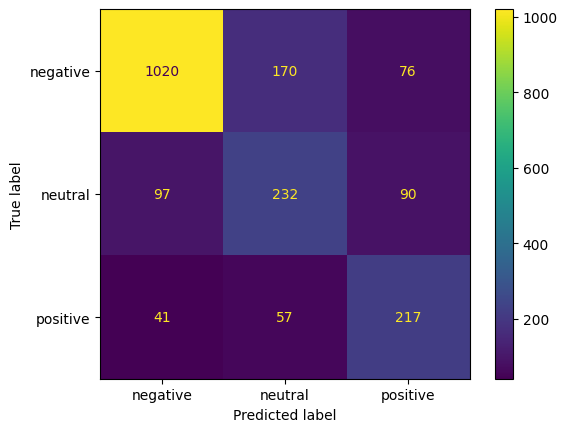

In [51]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat), display_labels=list(np.unique(Y)))
disp.plot()
plt.show()

# Using NLTK VADER

In [52]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [53]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon
# nltk.download('vader_lexicon')

# Instantiate the SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

str_data = list(map(' '.join, tweets_after_removing_SW))

for each in str_data[:4]:
    print('-----------------------------------------')
    print("Text:", each)
    print(vader.polarity_scores(each))

    #Predictions on the basis of compound score
    print("Using compound score: ",end = '')
    if (vader.polarity_scores(each)['compound']) >= 0.05: #A positive word will have a score greater than 0.
        print('Overall Postive')
    elif (vader.polarity_scores(each)['compound']) <= -0.05: #A negative word will have a score less than 0.
        print('Overall Negative')
    else:
        print('Overall Neutral')


    #Find the sentiment with the max probability
    print("Using maximum probability score: ", end = '')
    neg_prob  = vader.polarity_scores(each)["neg"]
    pos_prob = vader.polarity_scores(each)["pos"]
    neu_prob  = vader.polarity_scores(each)["neu"]

    ind = [neg_prob, pos_prob, neu_prob].index(max([neg_prob, pos_prob, neu_prob]))

    if(ind==0):
        print("Negative")
    elif(ind==1):
        print("Positive")
    else:
        print('neutral')

print('-----------------------------------------\n')

-----------------------------------------
Text: southwestair flight cancelled flightled due weather next
{'neg': 0.25, 'neu': 0.75, 'pos': 0.0, 'compound': -0.25}
Using compound score: Overall Negative
Using maximum probability score: neutral
-----------------------------------------
Text: jetblue d.c. thinking summer new nantucket service broadway world http //t.co/ds22ceeenj
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Using compound score: Overall Neutral
Using maximum probability score: neutral
-----------------------------------------
Text: americanair need change ticket res ca changed online also ca get call due high volume -- u help
{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4019}
Using compound score: Overall Postive
Using maximum probability score: neutral
-----------------------------------------
Text: usairways 3 delays 2 cancelled flightlations double layover 72 hours late flightr .... could least get extra dividend miles
{'neg': 0.111, 'neu': 0.889, 'p